In [1]:
import matplotlib.pyplot as plt
from numpy import pi as π
import numpy as np
import pandas as pd
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import dframe_tools as dtools
import plot_tools as ptools
import gen_resubmit as gensub
path = '/home/sang/UVM/He4T1set/01/OUTPUT'
dbase = dtools.df_pimc(path, skip = 0.0, noenergy = 1, replace = 0)

path2 = '/home/sang/UVM/He4T1set/07/OUTPUT'
dbase2 = dtools.df_pimc(path2, skip = 0.0, noenergy = 1, replace = 0)

path3 = '/home/sang/UVM/He4T1set/09/OUTPUT'
dbase3 = dtools.df_pimc(path3, skip = 0.0, noenergy = 1, replace = 0)

path4 = '/home/sang/UVM/He4T1set/10/OUTPUT'
dbase4 = dtools.df_pimc(path4, skip = 0.0, noenergy = 1, replace = 0)

plot style is loaded


In [3]:
# filter out some simulations
len(dbase[(dbase['mu']>=-105)])

55

In [4]:
dbase_to_push = dbase[dbase['mu']<-105]
len(dbase_to_push)

136

In [6]:
dbase2_2 = dbase2[dbase2['mu']>=-105]
len(dbase2_2)

243

In [7]:
len(dbase2[(dbase2['strain']>=0.05)&(dbase2['totN']==48)&(dbase2['mu']<=-93)])

12

In [8]:
dbase_to_push2 = (dbase2_2[(dbase2_2['strain']<0.05)|(dbase2_2['totN']!=48)|(dbase2_2['mu']>-93)])
len(dbase_to_push2)

231

In [9]:
fulldbase = pd.concat([dbase_to_push, dbase_to_push2, dbase3, dbase4], ignore_index=True)
print(len(fulldbase))

1209


In [10]:
# copy files
# ct = 0
# subset = dbase_to_push
# for idx, row in subset.iterrows():
# #     print(row['filedic'])
#     !cp /home/sang/UVM/He4T1set/01/OUTPUT/gce-*{row['id']}* /home/sang/UVM/He4T1set/selected/
# #     !rm ./tosend/gce-*{row['id']}*
#     ct += 1
# subset = dbase_to_push2
# for idx, row in subset.iterrows():
# #     print(row['filedic'])
#     !cp /home/sang/UVM/He4T1set/07/OUTPUT/gce-*{row['id']}* /home/sang/UVM/He4T1set/selected/
# #     !rm ./tosend/gce-*{row['id']}*
#     ct += 1
# subset = dbase3
# for idx, row in subset.iterrows():
# #     print(row['filedic'])
#     !cp /home/sang/UVM/He4T1set/09/OUTPUT/gce-*{row['id']}* /home/sang/UVM/He4T1set/selected/
# #     !rm ./tosend/gce-*{row['id']}*
#     ct += 1
# subset = dbase4
# for idx, row in subset.iterrows():
# #     print(row['filedic'])
#     !cp /home/sang/UVM/He4T1set/10/OUTPUT/gce-*{row['id']}* /home/sang/UVM/He4T1set/selected/
# #     !rm ./tosend/gce-*{row['id']}*
#     ct += 1
# print(ct)

1209


In [11]:
# Export data
fulldbase.to_csv('T1comm_data.csv',index=False)

In [12]:
def datadic_bysize(df):
    '''Make subset dataframes for each strain value and chemical potential'''
    sliced_dict = {}

    for N in df['totN'].unique():
        for T in df['T'].unique():
            subset = df[(df['totN'] == N)&(df['T'] == T)]
            if subset.empty:
                continue

            sliced_dict[str(N)+','+str(T)] = subset
    
    print(sliced_dict.keys())
    return sliced_dict

In [13]:
dfdict = datadic_bysize(fulldbase)

dict_keys(['48,1.0', '64,1.0', '90,1.0'])


In [14]:
def keysorting(k):
    t = k.split(',')
    n = float(t[0])*100000 + float(t[1])
    return n

keylst = []
for keys in dfdict.keys():
    keylst.append(keys)
keylst = sorted(keylst, key = lambda k: keysorting(k))
print(keylst)
print('number of category:', len(keylst))

['48,1.0', '64,1.0', '90,1.0']
number of category: 3


In [15]:
'''plot filling fraction and compressibilbity for single strain set'''
def simple_view(subset):
    if len(subset['strain'].unique()) != 1:
        print("the subset has more than one strain data")
        return None
    
    else:
        # sort by chemical potential
        subset = subset.sort_values('mu', ascending=True)
        subset = subset.reset_index()

        strain = round(subset['strain'].unique()[0] * 100)
        mulst = np.array(subset['mu'])
        nlst = np.array(subset['n'])
        nerrlst = np.array(subset['nerr'])
        totNlst = np.array(subset['totN'])
        fraclst = nlst/totNlst
        fracerrlst = nerrlst/totNlst
        kaplst = np.array(subset['kap'])
        
        # plot figure
        p1 = plt.figure( figsize = [6,4])

        plt.ylim(0, 1)
        plt.xlim(-130,-30)

        fracp = plt.errorbar(mulst, fraclst, yerr = fracerrlst, label = 'fraction',
                               fmt='-o', marker = '.', color = 'orange', ecolor='grey')
        mup = plt.bar(mulst, list(kaplst), label = 'compressibility')
        
        # Search 1/3 filling states
        for i in range(len(fraclst)):
            if fraclst[i] > 1/3-0.01 and fraclst[i] < 1/3+0.01 and kaplst[i] < 0.05:
                print('1/3 low:', mulst[i])
                break
        for i in range(len(fraclst)):
            if fraclst[-i-1] > 1/3-0.01 and fraclst[-i-1] < 1/3+0.01 and kaplst[-i-1] < 0.05:
                print('1/3 high:', mulst[-i-1])
                break
                
        # Search 7/16 filling states
        for i in range(len(fraclst)):
            if fraclst[i] > 7/16-0.01 and fraclst[i] < 7/16+0.01 and kaplst[i] < 0.05:
                print('7/16 low:', mulst[i])
                break
        for i in range(len(fraclst)):
            if fraclst[-i-1] > 7/16-0.01 and fraclst[-i-1] < 7/16+0.01 and kaplst[-i-1] < 0.05:
                print('7/16 high:', mulst[-i-1])
                break


        line1 = plt.axhline(1/3, c = 'tab:green' ,alpha = 0.5, label = '1/3')
        line2 = plt.axhline(7/16, c = 'tab:orange', alpha = 0.5, label = '7/16')
        line3 = plt.axhline(7/12, c = 'tab:red', alpha = 0.5, label = '7/12')
        line4 = plt.axhline(2/3, c = 'tab:purple', alpha = 0.5, label = '2/3')

        legend1 = plt.legend(handles = [line1,line2,line3,line4] ,loc='upper center', bbox_to_anchor=(0.5, 1.00),
                      ncol=4, fancybox=True, shadow=True)
        legend2 = plt.legend([fracp, mup], ['fraction', 'compressibility'], loc=4)
        plt.gca().add_artist(legend1)
        plt.gca().add_artist(legend2)
        
        plt.title(f"strain {strain} \%")
        plt.xlabel("chemical potential (K)")
        plt.ylabel("filling fraction")
#         plt.show()
        return p1

1/3 low: -123.0
1/3 high: -112.0
7/16 low: -103.0
7/16 high: -87.0


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


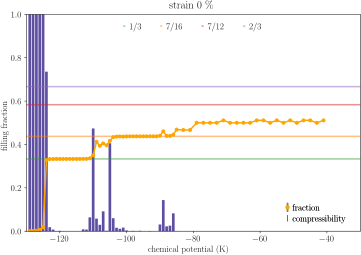

In [16]:
s = 0
subset = fulldbase[fulldbase['strain'] == s/100]
subset = subset.sort_values('mu', ascending=True)
subset = subset.reset_index()
p1 = simple_view(subset)

1/3 low: -123.0
1/3 high: -112.0
7/16 low: -103.0
7/16 high: -87.0
1/3 low: -121.0
1/3 high: -112.0
7/16 low: -103.0
7/16 high: -90.0
1/3 low: -119.0
1/3 high: -110.0
7/16 low: -102.0
7/16 high: -91.0
1/3 low: -116.0
1/3 high: -111.0
7/16 low: -102.0
7/16 high: -92.0
1/3 low: -114.0
1/3 high: -110.0
7/16 low: -102.0
7/16 high: -95.0
1/3 low: -112.0
1/3 high: -108.0
7/16 low: -100.0
7/16 high: -97.0
1/3 low: -110.0
1/3 high: -108.0
7/16 low: -99.0
7/16 high: -95.0
7/16 low: -98.0
7/16 high: -97.0
7/16 low: -97.0
7/16 high: -97.0


<ipython-input-53-ac7549d13d79>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  p1 = plt.figure( figsize = [6,4])


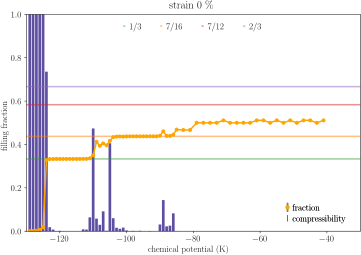

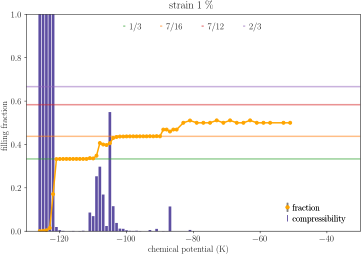

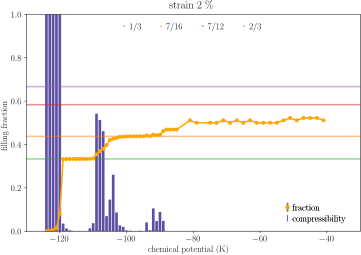

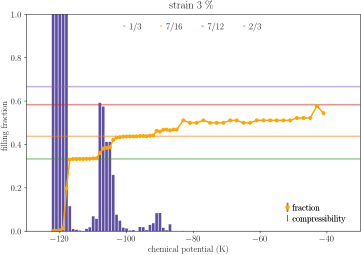

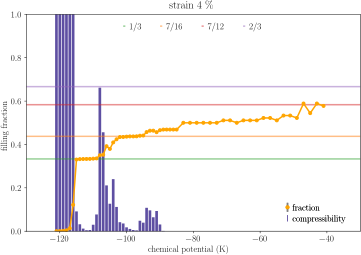

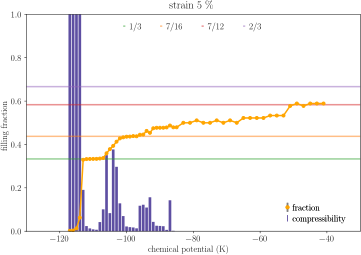

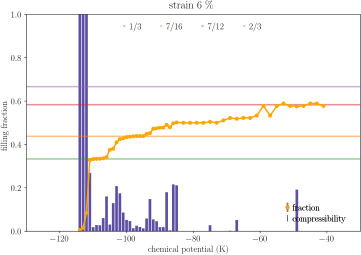

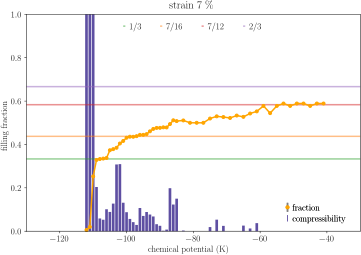

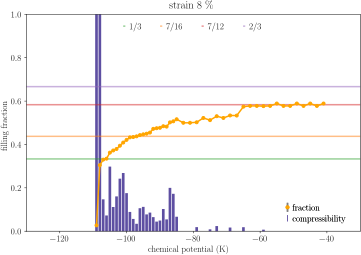

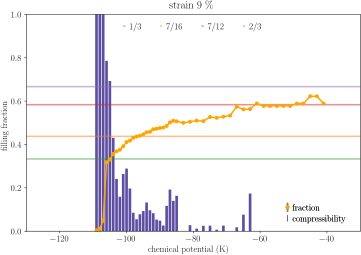

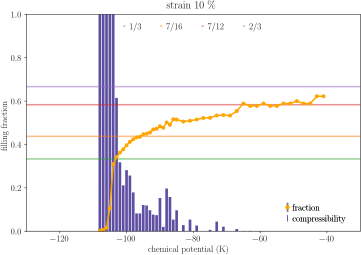

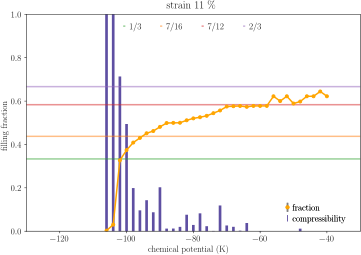

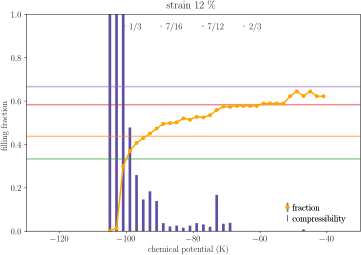

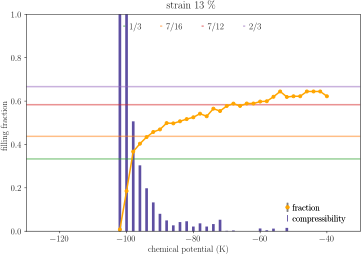

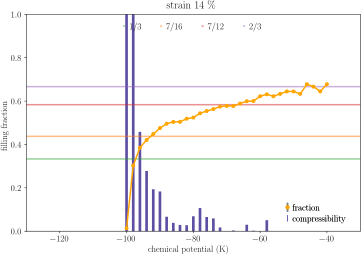

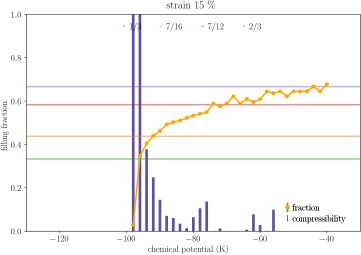

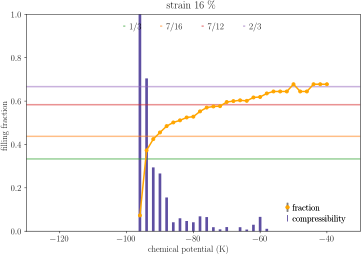

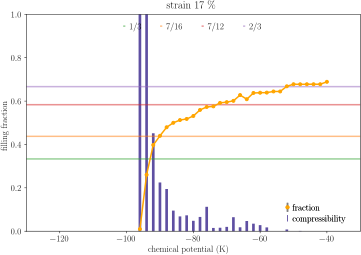

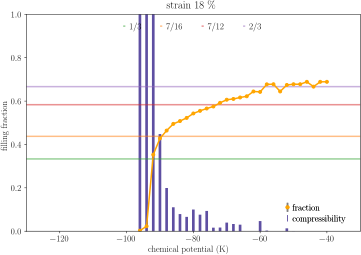

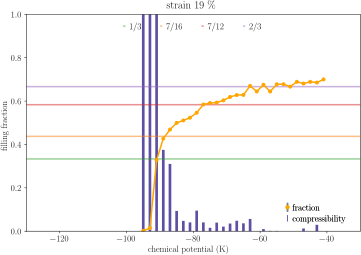

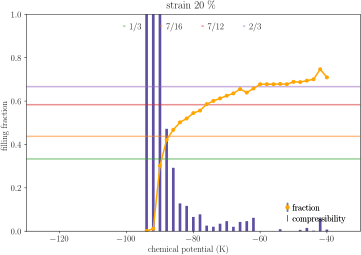

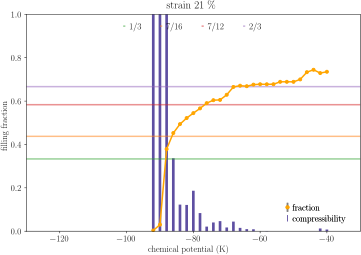

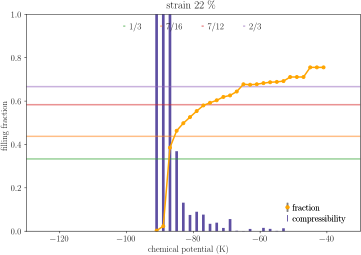

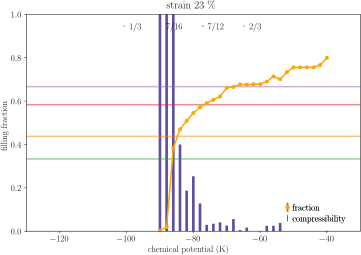

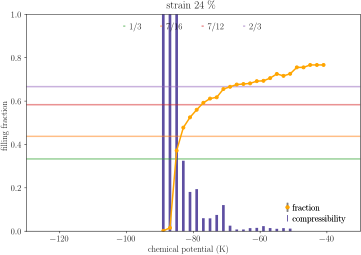

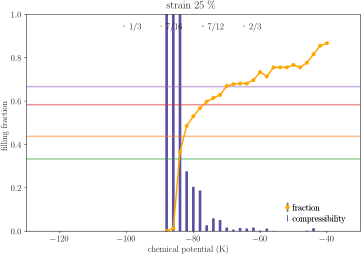

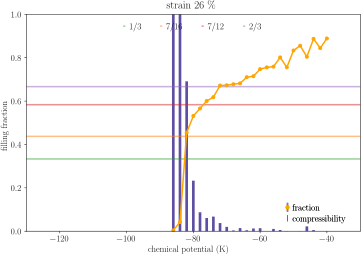

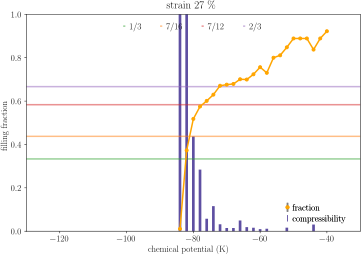

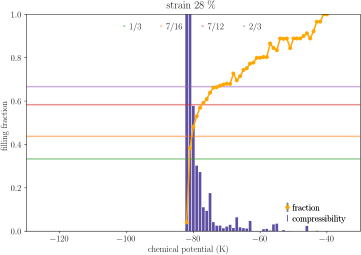

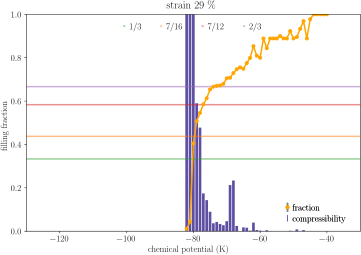

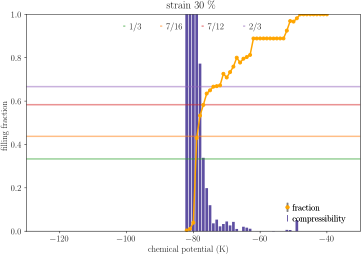

In [56]:
for s in range(31):
    subset = fulldbase[fulldbase['strain'] == s/100]
    subset = subset.sort_values('mu', ascending=True)
    subset = subset.reset_index()
    pic = simple_view(subset)
    pic.savefig(f'./phase_each/fill_at{s:02}')

In [17]:
# Record 1/3 filling phases
one_third_bound = [[-123.0,-112.0],
                   [-121.0,-112.0],
                   [-119.0,-110.0],
                   [-116.0,-110.0],
                   [-114.0,-110.0],
                   [-112.0,-108.0],
                   [-110.0,-108.0],
                  ]

In [18]:
# record 7/16 filling phases
seven_bound = [[-103.0,-87.0],
                [-103.0,-90.0],
                [-102.0,-91.0],
                [-102.0,-92.0],
                [-102.0,-95.0],
                [-100.0,-97.0],
                [-99.0,-95.0],
               [-98.0,-97.0],
                  ]

In [19]:
# return mu and 2d density rho
def den_maker(subset):
    if len(subset['strain'].unique()) != 1:
        print("the subset has more than one strain data")
        return None
    else:
        subset = subset.sort_values('mu', ascending=True)
        subset = subset.reset_index()

        mulst = np.array(subset['mu'])

        rho_lst = []

        for idx, row in subset.iterrows():
            file = row['filedic']['planeavedensity'] #file location
            with open(file,'r') as lines:
                header = lines.readline()
            ngridsep = int(header.split(' ')[-1][:-1])
            densityData = np.genfromtxt(file, skip_header=2,deletechars="") #read data
            rho = densityData.reshape([ngridsep,ngridsep]) #reshape to 2d
            rho_lst.append(rho)
            
        return mulst, rho_lst

# Compressibility map

In [20]:
strain_lst = np.arange(0,31,1)

mu_lst = [list( fulldbase[fulldbase['strain'] == int(s)/100].sort_values('mu', ascending=True)['mu'] ) for s in strain_lst]

kap_lst = [list( fulldbase[fulldbase['strain'] == int(s)/100].sort_values('mu', ascending=True)['kap'] ) for s in strain_lst]

In [21]:
# cap 1 to kappa
for item in kap_lst:
    for i in range(len(item)):
        if item[i] > 1.0:
            item[i] = 1.0

In [22]:
# insert regulator value
for i in range(len(strain_lst)):
    mu_lst[i].insert(0, mu_lst[0][0]-1.0)
    kap_lst[i].insert(0, 1.0)

In [23]:
# fix error at 1%
mu_lst[1].append(mu_lst[0][-1])
kap_lst[1].append(kap_lst[1][-1])

In [24]:
# 2d array for kappa
from scipy.interpolate import interp1d

data_cprb_intp = np.ones((31,100))
murange = np.linspace(mu_lst[0][0],mu_lst[0][-1],100)
for i in range(len(strain_lst)):
    f_kapdata = interp1d(mu_lst[i], kap_lst[i])
    new_kapdata = f_kapdata(murange)
    for j in range(100):
        data_cprb_intp[i,j] = new_kapdata[j]


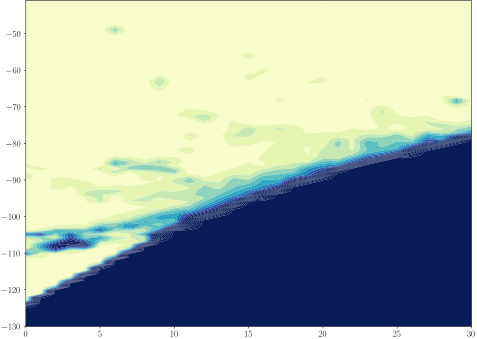

In [25]:
ppfig, ax = plt.subplots(figsize = [8,6])
pphase = ax.contourf(strain_lst, murange, np.transpose(data_cprb_intp),20, vmin = 0, vmax = 0.50, cmap="YlGnBu")

In [26]:
# import vacuum data
vac_line_x = np.genfromtxt("/home/sang/UVM/He4vacuum/vacuumline_x.csv")
vac_line_y1 = np.genfromtxt("/home/sang/UVM/He4vacuum/vacuumline_yd.csv")
vac_line_y2 = np.genfromtxt("/home/sang/UVM/He4vacuum/vacuumline_yu.csv")

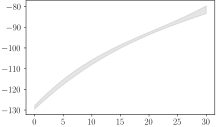

In [27]:
plt.fill_between(vac_line_x, vac_line_y1 -0.5, vac_line_y2 +0.5,
                 color='gray', alpha=0.2)

In [28]:
# import superfluid dot data
sf_dots_x = np.genfromtxt("/home/sang/UVM/He4vacuum/sfdots_x.csv")
sf_dots_y = np.genfromtxt("/home/sang/UVM/He4vacuum/sfdots_y.csv")
sf_dots_Tc = np.genfromtxt("/home/sang/UVM/He4vacuum/sfdots_Tc.csv")

In [29]:
# put superfluid transition line data
sf_transition_x = [0.12, 0.16, 0.18, 0.20, 0.22, 0.24]
sf_transition_y = [-91.8, -85.7, -84.1, -81.4, -81.1, -81.0]

In [31]:
def bottom_line(x_find):
    for i, x in enumerate(vac_line_x):
        if x >= x_find:
            return vac_line_y2[i] +0.5

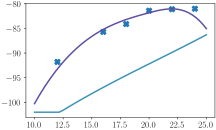

In [36]:
# draw superfluid regime
magic_x = [5,6,8,10]
magic_y = [-101, -101, -101, -101]
from scipy.interpolate import UnivariateSpline
target_x = [val*100 for val in sf_transition_x]
target_x.insert(0, 10)
target_x.append(25)
target_y = list(sf_transition_y)
target_y.insert(0, magic_y[-1])
target_y.append(bottom_line(25))
plt.scatter(np.array(sf_transition_x)*100, sf_transition_y, 
            s = 30, marker='X', color='tab:blue', )

new_x = np.linspace(10,25,50)
sfbulk = UnivariateSpline(target_x, target_y,)
plt.plot(new_x, sfbulk(new_x))
sfbulk_low = [max(bottom_line(k),-102) for k in new_x[:]]
# sfbulk_low.insert(0, sfbulk(10)-1)
plt.plot(new_x[:], sfbulk_low)

In [34]:
# put commensurate phase boundary
one_third_bound = [[-123.0,-112.0],
                   [-121.0,-112.0],
                   [-119.0,-110.0],
                   [-116.0,-110.0],
                   [-114.0,-110.0],
                   [-112.0,-108.0],
                   [-110.0,-108.0],
                  ]
seven_bound = [[-103.0,-87.0],
                [-103.0,-90.0],
                [-102.0,-91.0],
                [-102.0,-92.0],
                [-102.0,-95.0],
                [-100.0,-97.0],
                [-99.0,-95.0],
               [-98.0,-97.0],
                  ]

In [38]:
import os
if os.path.exists('include/sans.mplstyle'):
    # plot style
    plot_style = {'notebook':'include/notebook.mplstyle','aps':'include/aps.mplstyle', 
                  'sans':'include/sans.mplstyle'}
    plt.style.reload_library()
    plt.style.use(plot_style['sans'])
    figsize = plt.rcParams['figure.figsize']
    plt.rcParams['text.latex.preamble'] = f'\input{{{os.getcwd()}/include/texheader}}'

    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    print("plot style is loaded")

plot style is loaded


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


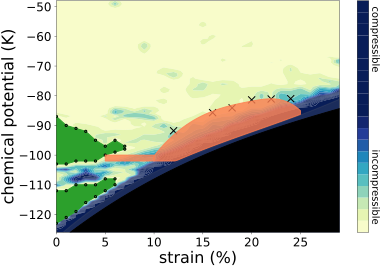

In [39]:
# Phase diagram
ppfig, ax = plt.subplots(figsize = [6,4],dpi=400)
pphase = ax.contourf(strain_lst, murange, np.transpose(data_cprb_intp),20, vmin = 0, vmax = 0.5, cmap="YlGnBu")
cbar = ppfig.colorbar(pphase)
cbar.set_ticks([])
# Vacuum line
plt.fill_between(vac_line_x, vac_line_y1 -0.5, vac_line_y2 +0.5,
                 color='dimgrey', alpha=0.2)
# Vacuum area
plt.fill_between(vac_line_x, vac_line_y1 -0.5, [-130,]*(len(vac_line_x)),
                 color='black', )
# One third
# plt.scatter([0,2], [-118,-116,],
#             s = 50, marker='^', color='tab:red', edgecolors= 'k')
one_third_x = [idx for idx in range(len(one_third_bound))]
plt.fill_between(one_third_x, 
                 np.array(one_third_bound)[:,0], 
                 np.array(one_third_bound)[:,1],
                 color='tab:green', )
plt.scatter(one_third_x, np.array(one_third_bound)[:,0], s = 20,
                 marker='.', color='tab:green', edgecolors= 'k')
plt.scatter(one_third_x, np.array(one_third_bound)[:,1], s = 20,
                 marker='.', color='tab:green', edgecolors= 'k')

# seven_sixteenth
# partial_y1 = [-100, -100, ]
# plt.scatter([0,2], partial_y1,
#             s = 50, marker='v', color='tab:red', edgecolors= 'k')
seven_sixteenth_x = [idx for idx in range(len(seven_bound))]
plt.fill_between(seven_sixteenth_x, 
                 np.array(seven_bound)[:,0], 
                 np.array(seven_bound)[:,1],
                 color='tab:green', )
plt.scatter(seven_sixteenth_x, np.array(seven_bound)[:,0], s = 20,
                 marker='.', color='tab:green', edgecolors= 'k')
plt.scatter(seven_sixteenth_x, np.array(seven_bound)[:,1], s = 20,
                 marker='.', color='tab:green', edgecolors= 'k')

# Magic SF
# plt.scatter([4,5,6,7,8,9,10], [-101,]*7, 
#             s = 30, marker='o', color='k', edgecolors= 'k', facecolor='none')
plt.fill_between(magic_x , np.array(magic_y) + 1.0, np.array(magic_y) - 1.0,
                 color='coral', alpha=0.8)
# Bulk SF
plt.scatter(np.array(sf_transition_x)*100, sf_transition_y, 
            s = 50, marker='x', color='k', )
plt.fill_between(new_x , sfbulk(new_x), sfbulk_low,
                 color='coral', alpha=0.8)

plt.xlim(0, 30-1)
plt.ylim(-126, -50+2)
plt.xlabel('strain (%)', fontsize=16)
plt.ylabel('chemical potential (K)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# ax.set_facecolor('slategray')
ppfig.text(0.882,0.72,'compressible', rotation = -90)
ppfig.text(0.882,0.19,'incompressible', rotation = -90)
plt.tight_layout()
plt.show()
# ppfig.savefig('./Allfigures/pd_enh.png', bbox_inches='tight', dpi=600, pad_inches=0.1,)

# 2D density frame generator

In [40]:
def den_maker_single(subset):
    if len(subset) != 1:
        print("the subset has more than one data")
        return None
    else:

        mulst = np.array(subset['mu'])

        file = subset.iloc[0]['filedic']['planeavedensity'] #file location
        with open(file,'r') as lines:
            header = lines.readline()
        ngridsep = int(header.split(' ')[-1][:-1])
        densityData = np.genfromtxt(file, skip_header=2,deletechars="") #read data
        rho = densityData.reshape([ngridsep,ngridsep]) #reshape to 2d
        box = [float(header.split(' ')[4])*ngridsep, float(header.split(' ')[7])*ngridsep]

        return mulst, rho, box, ngridsep

In [41]:
from graphenetools import gt
import matplotlib.patheffects as path_effects
path_eff = [path_effects.withSimplePatchShadow(offset=(0.06, -0.06), shadow_rgbFace='k', alpha=1.0)]
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

1.3


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.


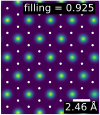

In [43]:
# strain : s, chemical potential : muval
s = 30
muval = -52
subset = fulldbase[fulldbase['strain'] == s/100]
scale = s/100+1
print(scale)
one_set = subset[ (subset['mu'] == muval) ]
mulst, rho, box, ngrid = den_maker_single(one_set)
# snap_fig = plt.figure('snap', )
snap_fig, ax = plt.subplots()
inset = ax.imshow(rho.T*10, extent=[-0.5*box[0],0.5*box[0],-0.5*box[1],0.5*box[1]])
plt.axis('off')
dens = round(float(one_set['n']/one_set['totN']), 4)
snap_fig.text(0.55,0.81,'filling = '+f'{dens}', 
              c='white', family= 'sans-serif', 
#               path_effects=path_eff,
              bbox={'facecolor':'black','alpha':1,'edgecolor':'none','pad':1},ha='center'
             )
c_positions = np.vstack(gt.get_graphene_carbon_atoms(0.0,[x/(scale) for x in box]))
c_positions *= scale
ax.scatter(c_positions[:,0],c_positions[:,1], s=2, c='w')
fixbox = [14.7570726, 17.03999975]
ax.set_xlim(-0.5*fixbox[0],0.5*fixbox[0])
ax.set_ylim(-0.5*fixbox[1],0.5*fixbox[1])
snap_fig.text(0.64,0.151, r'2.46 $\mathrm{\AA}$', 
              c='white', family= 'sans-serif', 
#               path_effects=path_eff,
              bbox={'facecolor':'black','alpha':1,'edgecolor':'none','pad':1},ha='center'
             )
scalebar = AnchoredSizeBar(ax.transData,
                           2.46, r'2.46 $\mathrm{\AA}$', 'lower right', 
                           pad=0.1,
                           color='white',
                           frameon=False,
                           size_vertical=0.2,
                          )
# scalebar.set_path_effects(path_eff)
ax.add_artist(scalebar)

# snap_fig.savefig('./Allfigures/snap_30-52_enh2.png')

# Continue?

In [44]:
target = fulldbase[fulldbase['estsize']<3000]
print(len(target))
date = 'May25'
gensub.continue_from(target, 'pimc_t1comm_cont', date, suffix = 0)

1209
writing at  /home/sang/UVM/He4HighT/pimc_t1comm_cont_May25_0.sh
The number of simulations in this dataframe : 1209
Your file is ready.
